Import all nessesary libs and read/prepare data

In [253]:
import pandas as pd
import scipy as sp
import numpy as np

import sklearn
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from numpy import arange
from sklearn import metrics
import os
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt

In [286]:
data = pd.read_csv('all_features.csv', sep='\t', index_col=0)
data = pd.DataFrame(data)
del data['Unnamed: 0.1']
del data['Unnamed: 0.1.1']
del data['\'\'']
data = data.drop(['sex', 'age', 'user_1grams', 'user_2grams', 'user_3grams'], axis = 1)
data = data.fillna(0)
ngrams_data = pd.read_csv('data_ngrams.csv', sep = '\t')
del ngrams_data['Unnamed: 0']

In [288]:
data.head()

,user,avr_mentions,avr_punctuation,avr_text_size,avr_starts_with_capital,avr_ends_with_punctuation,avr_capitals,avr_words_count,vocabulary_richness,CC,...,WDT,WP,WP$,WRB,",",.,),(,:,$
0,4905cc7a1396110c1a635c4e7b023de2,0.685185,2.148148,74.666667,0.796296,0.240741,0,0.064815,0.000000,0.388889,...,0.000000,0.000000,0,0.000000,0.111111,0.888889,0.037037,0.037037,0.722222,0.000000
1,6733b2957179358024cc5c493f28924a,1.200000,2.563636,88.636364,0.236364,0.763636,0,0.172727,0.000000,0.600000,...,0.000000,0.072727,0,0.000000,0.345455,1.109091,0.090909,0.036364,0.727273,0.000000
2,9aa58b658935d017e0827d1b42e75596,0.494483,3.477432,103.528586,0.676028,0.563691,0,0.019057,35.269122,1.347041,...,0.019057,0.069208,0,0.057172,0.274824,1.338014,0.070211,0.034102,0.996991,0.000000
3,454904ba35745fd0499f229c4b3e851c,1.207207,4.055055,135.671672,0.853854,0.653654,0,0.017017,24.653740,1.025025,...,0.026026,0.094094,0,0.090090,0.311311,1.723724,0.030030,0.013013,1.231231,0.029029
4,4dc094fb37152396199cb951207bb75d,0.302949,1.938338,82.536193,0.190349,0.319035,0,0.006702,0.000000,0.549598,...,0.018767,0.018767,0,0.056300,0.123324,0.428954,0.120643,0.069705,0.906166,0.013405


In [289]:
ngrams_data = ngrams_data.drop(['avr_mentions', 'avr_punctuation',
       'avr_text_size', 'avr_starts_with_capital', 'avr_ends_with_punctuation',
       'avr_capitals', 'avr_words_count', 'vocabulary_richness'], axis = 1)
ngrams_data.head()

,user,sex,age,user_common_1grams,user_common_2grams,user_common_3grams,user_age_18_24_ngrams,user_age_25_34_ngrams,user_age_35_49_ngrams,user_age_50_64_ngrams,user_age_65_xx_ngrams,user_gender_male_ngrams,user_gender_female_ngrams
0,4905cc7a1396110c1a635c4e7b023de2,FEMALE,50-64\n,0.425926,0.481481,0.546296,1.046296,1.138889,1.129630,1.092593,0.796296,1.064815,1.222222
1,6733b2957179358024cc5c493f28924a,MALE,50-64\n,1.300000,1.472727,1.500000,1.854545,1.936364,1.954545,2.009091,1.463636,2.000000,1.945455
2,9aa58b658935d017e0827d1b42e75596,MALE,18-24\n,0.753260,1.003009,1.034102,1.913741,1.688064,1.668004,1.605817,1.005015,1.715145,1.665998
3,454904ba35745fd0499f229c4b3e851c,FEMALE,35-49\n,0.615616,0.824825,0.869870,1.059059,1.123123,1.194194,1.140140,0.794795,1.133133,1.201201
4,4dc094fb37152396199cb951207bb75d,MALE,35-49\n,0.695710,0.813673,0.820375,1.170241,1.276139,1.305630,1.223861,0.813673,1.308311,1.252011


In [290]:
users_data = ngrams_data.merge(data, on = 'user')

X = users_data.drop(['user', 'sex', 'age'], axis = 1)
Yage = users_data['age']
Ysex = users_data['sex']

users_data.head()

,user,sex,age,user_common_1grams,user_common_2grams,user_common_3grams,user_age_18_24_ngrams,user_age_25_34_ngrams,user_age_35_49_ngrams,user_age_50_64_ngrams,...,WDT,WP,WP$,WRB,",",.,),(,:,$
0,4905cc7a1396110c1a635c4e7b023de2,FEMALE,50-64\n,0.425926,0.481481,0.546296,1.046296,1.138889,1.129630,1.092593,...,0.000000,0.000000,0,0.000000,0.111111,0.888889,0.037037,0.037037,0.722222,0.000000
1,6733b2957179358024cc5c493f28924a,MALE,50-64\n,1.300000,1.472727,1.500000,1.854545,1.936364,1.954545,2.009091,...,0.000000,0.072727,0,0.000000,0.345455,1.109091,0.090909,0.036364,0.727273,0.000000
2,9aa58b658935d017e0827d1b42e75596,MALE,18-24\n,0.753260,1.003009,1.034102,1.913741,1.688064,1.668004,1.605817,...,0.019057,0.069208,0,0.057172,0.274824,1.338014,0.070211,0.034102,0.996991,0.000000
3,454904ba35745fd0499f229c4b3e851c,FEMALE,35-49\n,0.615616,0.824825,0.869870,1.059059,1.123123,1.194194,1.140140,...,0.026026,0.094094,0,0.090090,0.311311,1.723724,0.030030,0.013013,1.231231,0.029029
4,4dc094fb37152396199cb951207bb75d,MALE,35-49\n,0.695710,0.813673,0.820375,1.170241,1.276139,1.305630,1.223861,...,0.018767,0.018767,0,0.056300,0.123324,0.428954,0.120643,0.069705,0.906166,0.013405


Plot of average words for every age category

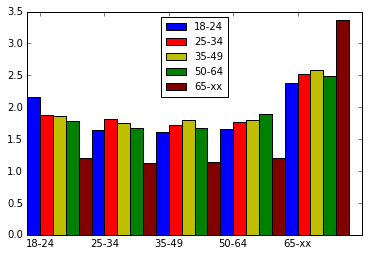

In [205]:
plt.clf()
p = plt.subplot()
classes = np.arange(6)
width = 0.2

for i in range(1, 6):
    if i == 1: 
        age = '18-24\n'
    elif i == 2: 
        age = '25-34\n'
    elif i == 3: 
        age = '35-49\n'
    elif i == 4: 
        age = '50-64\n'
    elif i == 5:
        age = '65-xx\n'
        
    p.bar(i - 1, users_data[users_data['age'] == age]['user_age_18_24_ngrams'].mean(), width, 
            color = 'b', label = '18-24' if i == 1 else '')
    p.bar(i - 0.8, users_data[users_data['age'] == age]['user_age_25_34_ngrams'].mean(), width, 
            color = 'r', label = '25-34' if i == 1 else '')
    p.bar(i - 0.6, users_data[users_data['age'] == age]['user_age_35_49_ngrams'].mean(), width, 
            color = 'y', label = '35-49' if i == 1 else '')
    p.bar(i - 0.4, users_data[users_data['age'] == age]['user_age_50_64_ngrams'].mean(), width, 
            color = 'g', label = '50-64' if i == 1 else '')
    p.bar(i -0.2 , users_data[users_data['age'] == age]['user_age_65_xx_ngrams'].mean(), width, 
            color = 'maroon', label = '65-xx' if i == 1 else '')


p.set_xticks(classes + width)
p.set_xticklabels(('18-24', '25-34', '35-49', '50-64', '65-xx'))
p.legend(borderpad = 0.5, prop={'size':10}, loc='upper center')
plt.show()
plt.savefig('plots/user_age_ngrams.png')

### See inside age ngrams features and build some models

In [305]:
X_ngrams_train = X[['user_common_1grams', 'user_common_2grams', 'user_common_3grams',
       'user_age_18_24_ngrams', 'user_age_25_34_ngrams',
       'user_age_35_49_ngrams', 'user_age_50_64_ngrams',
       'user_age_65_xx_ngrams', 'user_gender_male_ngrams',
       'user_gender_female_ngrams']]

# split data for AGE
X = pd.DataFrame(X)
Xage_train, Xage_test, Yage_train, Yage_test = train_test_split(X_ngrams_train, Yage, 
                                                                test_size = 0.2, random_state = 23)

# split data for SEX
Xsex_train, Xsex_test, Ysex_train, Ysex_test = train_test_split(X_ngrams_train, Ysex, 
                                                                test_size = 0.2, random_state = 23)

# build logistic regression model
# AGE
log_model_age_ngrams = LogisticRegression()
log_model_age_ngrams.fit(Xage_train, Yage_train)
accuracy_age_ngrams = accuracy_score(Yage_test, log_model_age_ngrams.predict(Xage_test))
print ('[Ngrams Features] Logistic Regression accuracy-Score for AGE: %.3f' % accuracy_age_ngrams)

# SEX
log_model_sex_ngrams = LogisticRegression()
log_model_sex_ngrams.fit(Xsex_train, Ysex_train)
predict = log_model_sex_ngrams.predict(Xsex_test)
accuracy_sex_ngrams = accuracy_score(Ysex_test, log_model_sex_ngrams.predict(Xsex_test))
print ('[Ngrams Features] Logistic Regression accuracy-Score for GENDER %.3f' % accuracy_sex_ngrams)

joblib.dump(log_model_age_ngrams, 'AGE_model.pkl')
joblib.dump(log_model_sex_ngrams, 'GENDER_model.pkl')

[Ngrams Features] Logistic Regression accuracy-Score for AGE: 0.705
[Ngrams Features] Logistic Regression accuracy-Score for GENDER 0.898


['GENDER_model.pkl',
 'GENDER_model.pkl_01.npy',
 'GENDER_model.pkl_02.npy',
 'GENDER_model.pkl_03.npy',
 'GENDER_model.pkl_04.npy']

In [304]:
pd.DataFrame(np.array(Ysex_test), np.array(log_model_sex_ngrams.predict(Xsex_test)))
print(Xsex_train)

     user_common_1grams  user_common_2grams  user_common_3grams  \
98             0.688000            0.895000            0.978000   
285            0.754167            0.850000            0.862500   
262            0.675082            0.783754            0.810099   
147            0.784000            0.977000            0.992000   
158            1.164286            1.278571            1.278571   
414            0.659722            0.725694            0.767361   
323            0.560043            0.669501            0.686504   
344            0.775641            0.961538            1.002137   
4              0.695710            0.813673            0.820375   
57             0.737681            0.918841            0.952174   
89             0.450935            0.500000            0.532710   
395            1.462963            1.648148            1.666667   
123            0.487680            0.551335            0.562628   
422            0.727000            1.015000            1.08200

In [273]:
X.columns

Index(['user_common_1grams', 'user_common_2grams', 'user_common_3grams',
       'user_age_18_24_ngrams', 'user_age_25_34_ngrams',
       'user_age_35_49_ngrams', 'user_age_50_64_ngrams',
       'user_age_65_xx_ngrams', 'user_gender_male_ngrams',
       'user_gender_female_ngrams', 'avr_mentions', 'avr_punctuation',
       'avr_text_size', 'avr_starts_with_capital', 'avr_ends_with_punctuation',
       'avr_capitals', 'avr_words_count', 'vocabulary_richness', 'CC', 'CD',
       'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS',
       'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP',
       'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP',
       'WP$', 'WRB', ',', '.', ')', '(', ':', '$'],
      dtype='object')

In [265]:
# build GBM model
# AGE
GBM_model_age_ngrams = GradientBoostingClassifier()
GBM_model_age_ngrams.fit(Xage_train, Yage_train)
accuracy_gbm_age_ngrams = accuracy_score(Yage_test, GBM_model_age_ngrams.predict(Xage_test))
print('[Ngrams Features] GBM accuracy-Score for AGE: %.3f' % accuracy_gbm_age_ngrams)

# SEX
GBM_model_sex_ngrams = GradientBoostingClassifier()
GBM_model_sex_ngrams.fit(Xsex_train, Ysex_train)
accuracy_gbm_sex_ngrams = accuracy_score(Ysex_test, GBM_model_sex_ngrams.predict(Xsex_test))
print('[Ngrams Features] GBM accuracy-Score for GENDER: %.3f' % accuracy_gbm_sex_ngrams)

joblib.dump(log_model_age_ngrams, 'AGE_model.pkl')
joblib.dump(log_model_sex_ngrams, 'GENDER_model.pkl')

[Ngrams Features] GBM accuracy-Score for AGE: 0.679
[Ngrams Features] GBM accuracy-Score for GENDER: 0.695


['GENDER_model.pkl',
 'GENDER_model.pkl_01.npy',
 'GENDER_model.pkl_02.npy',
 'GENDER_model.pkl_03.npy',
 'GENDER_model.pkl_04.npy']

In [222]:
# Build SVC model
SVC_model_age_ngrams = SVC()
SVC_model_age_ngrams.fit(Xage_train, Yage_train)
accuracy_svc_age_ngrams = accuracy_score(Yage_test, SVC_model_age_ngrams.predict(Xage_test))
print('[Ngrams Features] SVC accuracy-Score for AGE: %.3f' % accuracy_gbm_age_ngrams)

# SEX
SVC_model_sex_ngrams = SVC()
SVC_model_sex_ngrams.fit(Xsex_train, Ysex_train)
accuracy_svc_sex_ngrams = accuracy_score(Ysex_test, SVC_model_sex_ngrams.predict(Xsex_test))
print('[Ngrams Features] SVC accuracy-Score for GENDER: %.3f' % accuracy_svc_sex_ngrams)

[Ngrams Features] SVC accuracy-Score for AGE: 0.625
[Ngrams Features] SVC accuracy-Score for GENDER: 0.545


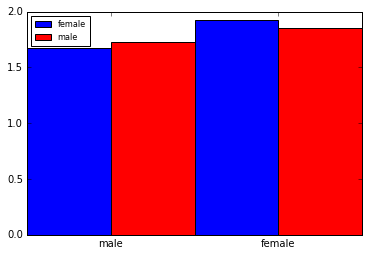

In [92]:
plt.clf()
p = plt.subplot()
classes = np.arange(2)
width = 0.5

for i in range(1, 3):
    if i == 1: 
        gender = 'MALE'
    elif i == 2: 
        gender = 'FEMALE'
        
    p.bar(i - 1, users_data[users_data['sex'] == gender]['user_gender_female_ngrams'].mean(), width, 
            color = 'b', label = 'female' if i == 1 else '')
    p.bar(i - 0.5, users_data[users_data['sex'] == gender]['user_gender_male_ngrams'].mean(), width, 
            color = 'r', label = 'male' if i == 1 else '')


p.set_xticks(classes + width)
p.set_xticklabels(('male', 'female'))
p.legend(borderpad = 0.5, prop={'size':8}, loc='upper left')
plt.show()
plt.savefig('plots/user_gender_ngrams.png')

### Let's see inside textual features

In [224]:
X_postags = X.drop(['user_age_18_24_ngrams', 'user_age_25_34_ngrams',
       'user_age_35_49_ngrams', 'user_age_50_64_ngrams',
       'user_age_65_xx_ngrams', 'user_gender_male_ngrams',
       'user_gender_female_ngrams'], axis = 1)

# split data for AGE
X = pd.DataFrame(X)
Xage_train, Xage_test, Yage_train, Yage_test = train_test_split(X_postags, Yage, 
                                                                test_size = 0.20, random_state = 23)

# split data for SEX
Xsex_train, Xsex_test, Ysex_train, Ysex_test = train_test_split(X_postags, Ysex, 
                                                                test_size = 0.20, random_state = 23)

# build logistic regression model for textual features
# AGE
log_model_age_postags = LogisticRegression()
log_model_age_postags.fit(Xage_train, Yage_train)
accuracy_age_postags = accuracy_score(Yage_test, log_model_age_postags.predict(Xage_test))
print ('[Postags Features] Logistic Regression accuracy-Score for AGE: %.3f' % accuracy_age_postags)
b
# SEX
log_model_sex_postags = LogisticRegression()
log_model_sex_postags.fit(Xsex_train, Ysex_train)
predict = log_model_sex_postags.predict(Xsex_test)
acuracy_sex_postags = accuracy_score(Ysex_test, log_model_sex_postags.predict(Xsex_test))
print ('[Postags Features] Logistic Regression accuracy-Score for GENDER %.3f' % accuracy_sex_postags)

[Postags Features] Logistic Regression accuracy-Score for AGE: 0.432
[Postags Features] Logistic Regression accuracy-Score for GENDER 0.591


In [230]:
# GBM model
gbm_model_age_postags = GradientBoostingClassifier()
gbm_model_age_postags.fit(Xage_train, Yage_train)
accuracy_gbm_age_postags = accuracy_score(Yage_test, gbm_model_age_postags.predict(Xage_test))
print ('[Postags Features] GBM accuracy-Score for AGE: %.3f' % accuracy_gbm_age_postags)

# SEX
gbm_model_sex_postags = LogisticRegression()
gbm_model_sex_postags.fit(Xsex_train, Ysex_train)
predict = gbm_model_sex_postags.predict(Xsex_test)
accuracy_gbm_sex_postags = accuracy_score(Ysex_test, gbm_model_sex_postags.predict(Xsex_test))
print ('[Postags Features] Logistic Regression accuracy-Score for GENDER %.3f' % accuracy_gbm_sex_postags)

[Postags Features] GBM accuracy-Score for AGE: 0.409
[Postags Features] Logistic Regression accuracy-Score for GENDER 0.591


In [231]:
# build SVC model for textual features
# AGE
svc_model_age_postags = SVC()
svc_model_age_postags.fit(Xage_train, Yage_train)
accuracy_svc_age_postags = accuracy_score(Yage_test, svc_model_age_postags.predict(Xage_test))
print ('[Postags Features] SVC accuracy-Score for AGE: %.3f' % accuracy_svc_age_postags)

svc_model_sex_postags = SVC()
svc_model_sex_postags.fit(Xsex_train, Ysex_train)
accuracy_svc_sex_postags = accuracy_score(Ysex_test, svc_model_sex_postags.predict(Xsex_test))
print ('[Postags Features] SVC accuracy-Score for GENDER: %.3f' % accuracy_svc_sex_postags)

[Postags Features] SVC accuracy-Score for AGE: 0.307
[Postags Features] SVC accuracy-Score for GENDER: 0.534


### Let's combine features together

In [233]:
# split data for AGE
X = pd.DataFrame(X)
Xage_train, Xage_test, Yage_train, Yage_test = train_test_split(X, Yage, 
                                                                test_size = 0.20, random_state = 23)

# split data for SEX
Xsex_train, Xsex_test, Ysex_train, Ysex_test = train_test_split(X, Ysex, 
                                                                test_size = 0.20, random_state = 23)

In [239]:
# Logistic Regression model
# AGE
log_model_age_all = LogisticRegression()
log_model_age_all.fit(Xage_train, Yage_train)
accuracy_age_all = accuracy_score(Yage_test, log_model_age_all.predict(Xage_test))
print ('[ALL Features] Logistic Regression accuracy-Score for AGE: %.3f' % accuracy_age_all)

# SEX
log_model_sex_all = LogisticRegression()
log_model_sex_all.fit(Xsex_train, Ysex_train)
predict = log_model_sex_all.predict(Xsex_test)
acuracy_sex_all = accuracy_score(Ysex_test, log_model_sex_all.predict(Xsex_test))
print ('[ALL Features] Logistic Regression accuracy-Score for GENDER %.3f' % acuracy_sex_all)

[ALL Features] Logistic Regression accuracy-Score for AGE: 0.591
[ALL Features] Logistic Regression accuracy-Score for GENDER 0.739


In [240]:
# GBM model
# AGE
gbm_model_age_all = GradientBoostingClassifier()
gbm_model_age_all.fit(Xage_train, Yage_train)
accuracy_gbm_age_all = accuracy_score(Yage_test, gbm_model_age_all.predict(Xage_test))
print ('[ALL Features] GBM accuracy-Score for AGE: %.3f' % accuracy_gbm_age_all)

# SEX
gbm_model_sex_all = LogisticRegression()
gbm_model_sex_all.fit(Xsex_train, Ysex_train)
predict = gbm_model_sex_all.predict(Xsex_test)
accuracy_gbm_sex_all = accuracy_score(Ysex_test, gbm_model_sex_all.predict(Xsex_test))
print ('[ALL Features] Logistic Regression accuracy-Score for GENDER %.3f' % accuracy_gbm_sex_all)

[ALL Features] GBM accuracy-Score for AGE: 0.443
[ALL Features] Logistic Regression accuracy-Score for GENDER 0.739


In [248]:
# build SVC model for textual features
# AGE
svc_model_age_all = SVC()
svc_model_age_all.fit(Xage_train, Yage_train)
accuracy_svc_age_all = accuracy_score(Yage_test, svc_model_age_all.predict(Xage_test))
print ('[ALL Features] SVC accuracy-Score for AGE: %.3f' % accuracy_svc_age_all)

svc_model_sex_all = SVC()
svc_model_sex_all.fit(Xsex_train, Ysex_train)
accuracy_svc_sex_all = accuracy_score(Ysex_test, svc_model_sex_all.predict(Xsex_test))
print ('[ALL Features] SVC accuracy-Score for GENDER: %.3f' % accuracy_svc_sex_all)

[ALL Features] SVC accuracy-Score for AGE: 0.352
[ALL Features] SVC accuracy-Score for GENDER: 0.523


Let's delete postags features and see inside inly textual features

In [245]:
data.columns
X_textual = X.drop(['CC', 'CD', 'DT', 'EX', 'FW',
       'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT',
       'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB',
       'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', ',', '.',
       ')', '(', ':', '$'], axis = 1)

Xage_train, Xage_test, Yage_train, Yage_test = train_test_split(X_textual, Yage, 
                                                                test_size = 0.20, random_state = 23)

# split data for SEX
Xsex_train, Xsex_test, Ysex_train, Ysex_test = train_test_split(X_textual, Ysex, 
                                                                test_size = 0.20, random_state = 23)

In [246]:
# Logistic Regression model
# AGE
log_model_age_txt = LogisticRegression()
log_model_age_txt.fit(Xage_train, Yage_train)
accuracy_age_txt = accuracy_score(Yage_test, log_model_age_txt.predict(Xage_test))
print ('[Textual Features] Logistic Regression accuracy-Score for AGE: %.3f' % accuracy_age_txt)

# SEX
log_model_sex_txt = LogisticRegression()
log_model_sex_txt.fit(Xsex_train, Ysex_train)
predict = log_model_sex_txt.predict(Xsex_test)
acuracy_sex_txt = accuracy_score(Ysex_test, log_model_sex_txt.predict(Xsex_test))
print ('[Textual Features] Logistic Regression accuracy-Score for GENDER %.3f' % acuracy_sex_txt)

[Textual Features] Logistic Regression accuracy-Score for AGE: 0.602
[Textual Features] Logistic Regression accuracy-Score for GENDER 0.795


In [247]:
# GBM model
gbm_model_age_txt = GradientBoostingClassifier()
gbm_model_age_txt.fit(Xage_train, Yage_train)
accuracy_gbm_age_txt = accuracy_score(Yage_test, gbm_model_age_txt.predict(Xage_test))
print ('[Textual Features] GBM accuracy-Score for AGE: %.3f' % accuracy_gbm_age_txt)

# SEX
gbm_model_sex_txt = LogisticRegression()
gbm_model_sex_txt.fit(Xsex_train, Ysex_train)
predict = gbm_model_sex_txt.predict(Xsex_test)
accuracy_gbm_sex_txt = accuracy_score(Ysex_test, gbm_model_sex_txt.predict(Xsex_test))
print ('[Textual Features] Logistic Regression accuracy-Score for GENDER %.3f' % accuracy_gbm_sex_txt)

[Textual Features] GBM accuracy-Score for AGE: 0.534
[Textual Features] Logistic Regression accuracy-Score for GENDER 0.795


In [249]:
# build SVC model for textual features
# AGE
svc_model_age_txt = SVC()
svc_model_age_txt.fit(Xage_train, Yage_train)
accuracy_svc_age_txt = accuracy_score(Yage_test, svc_model_age_txt.predict(Xage_test))
print ('[ALL Features] SVC accuracy-Score for AGE: %.3f' % accuracy_svc_age_txt)

svc_model_sex_txt = SVC()
svc_model_sex_txt.fit(Xsex_train, Ysex_train)
accuracy_svc_sex_txt = accuracy_score(Ysex_test, svc_model_sex_txt.predict(Xsex_test))
print ('[ALL Features] SVC accuracy-Score for GENDER: %.3f' % accuracy_svc_sex_txt)

[ALL Features] SVC accuracy-Score for AGE: 0.352
[ALL Features] SVC accuracy-Score for GENDER: 0.523
